#Pipeline-1
Converting the input image to another format to eliminate noise, lighting variations in background, and extracting edges. <br />Mounting the google drive to colab helps to manage the temporary session easily.

In [ ]:
#MOUNTING GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install mapper

     |████████████████████████████████| 3.0MB 4.5MB/s 
  Created wheel for mapper: filename=mapper-0.1.17-cp36-none-any.whl size=1918872 sha256=6c2b0ef8ddaf403f1c9ed7659151e4cfe58b54e7703c0bcc23567af77b562de0
  Stored in directory: /root/.cache/pip/wheels/43/54/8f/f14fca54d9ac27835ce2f71c09c22df114e01701ff805c38cb
Successfully built mapper


In [ ]:
import cv2
import numpy as np
import mapper
import matplotlib.pyplot as plt
from PIL import Image

Mapper warning: Could not load the module “fastcluster”.
The module “scipy.cluster.hierarchy“ is used instead, but it will be slower.
The 'cmappertools' module could not be imported.
The 'cmappertools' module could not be imported.
Intrinsic metric is not available.
The 'cmappertools' module could not be imported.


In [ ]:
def show_image(image_object,name):
  plt.figure(figsize=(14, 7))
  plt.title(name)
  plt.imshow(image_object)

edged_image=""
def preprocess1(image_path):
  image=cv2.imread(image_path)   #read in the image
  #image=cv2.resize(image,(1300,800)) #resizing because opencv does not work well with bigger images
  show_image(image,"Input_Image")

  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  #RGB To Gray Scale
  show_image(gray,"Grayscale_Image")

  blurred=cv2.GaussianBlur(gray,(5,5),0)  #(5,5) is the kernel size and 0 is sigma that determines the amount of blur
  show_image(blurred,"Blurred_Image")

  edged=cv2.Canny(blurred,30,50)  #30 MinThreshold and 50 is the MaxThreshold
  show_image(edged,"Edged_Image")
  new_image_name=input("Enter name for the processed image to get saved..")
  cv2.imwrite(new_image_name,edged)
  global edged_image
  edged_image=new_image_name


Enter name for the processed image to get saved..nandanaedgedhw.jpeg


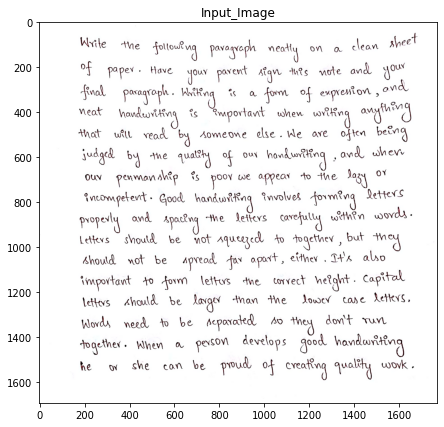

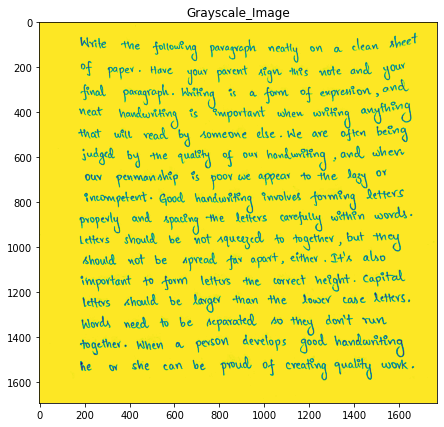

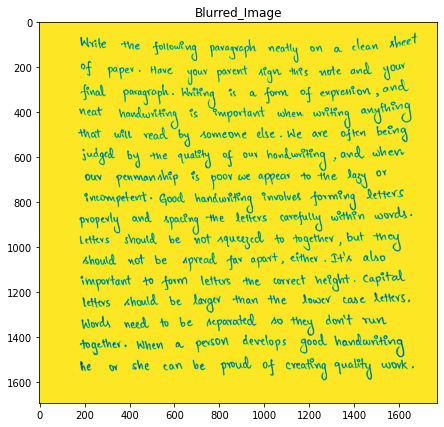

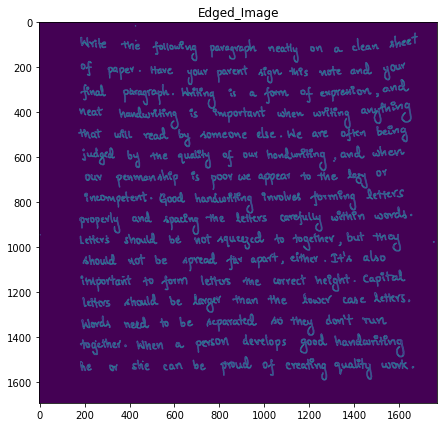

In [ ]:
preprocess1("/content/nandanahw.jpeg")

Enter name for the processed image to get saved..ammahwedged.jpeg


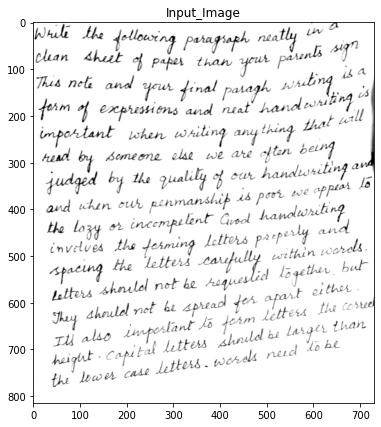

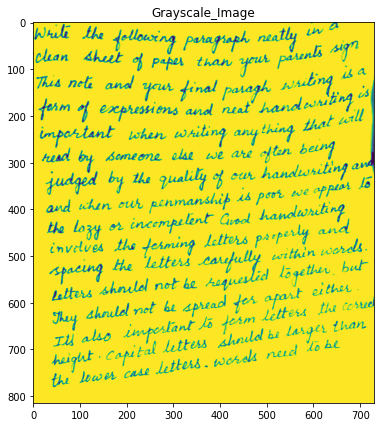

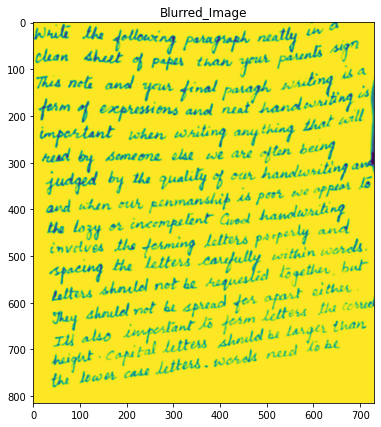

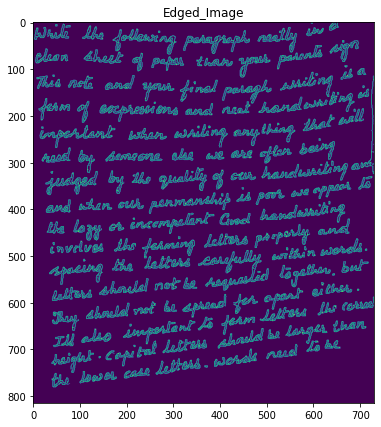

In [ ]:
preprocess1("/content/ammahw.jpeg")

#Pipeline-2

Many utility functions to handle the images in colab for creating folders,renaming,moving,zipping,downloading etc
Image Augmentation is performed by using a pytho package called 'Augmentor' <br />
Mainly operations like:- <br />
1)rotation with 12 degrees clock and 14 degress anti clock<br />
2)rotation with 10 degees clock and 8 degrees anti clock<br />
3)distortion with grid width 10,grid height 10 and magnitude 12 <br />
4)distortion with grid width 4,grid height 4 and magnitude 8<br />
5)random slices of 224*224 are extracted for every image<br />

In [ ]:
!pip install Augmentor

In [ ]:
#ZIPPING FOLDERS AND DOWNLOAD THE ZIP FILE AUTOMATICALLY

import shutil
from google.colab import files
def make_zipfolder(zipfoldername,folder_path):
  shutil.make_archive(zipfoldername, 'zip', folder_path)
  files.download(zipfoldername+".zip")

# DELETING A FOLDER WITH CONTENT DIRECTLY
def delete_folder(path):
  shutil.rmtree(path)

In [ ]:
#ZIPPER CELL
#make_zipfolder("nags_augmented_imgs",output_directory)  
make_zipfolder("aswadcroppedimgs","/content/aswadcroppedimgs")  #give anyname that u like

In [ ]:
delete_folder('/content/origimgs')
#delete_folder('/content/croppedimgs67')  #These 2 folders are mostly needed to get deleted

In [ ]:
#FOR DISPLAYING SINGLE IMAGE

def view_image(path):
  print("path=",path)
  img = cv2.imread(path)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_cvt)
  plt.show()

path= /content/nandanaedged.jpeg


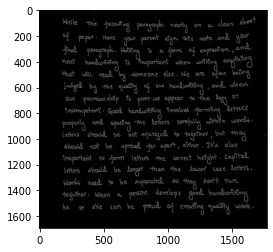

In [ ]:
view_image("/content/nandanaedged.jpeg")

In [ ]:
#FOR SHOWING ALL THE IMAGES IN A FOLDER

import os
directory = "/content/origimgs"
output_directory="/content/origimgs/output"
def display_images(directory,cnt=50):
  no=0
  for filename in os.listdir(directory):
    print(filename)
    if(filename==".ipynb_checkpoints"):
      continue
    view_image(directory+"/"+filename)
    no=no+1
    if(no==cnt):
      break


In [ ]:
#RENAMING FILES IN A FOLDER

def rename_files(dir_path,operation,execs):
  count=1
  for filename in os.listdir(dir_path):
    if(filename[:8]=='origimgs'):
      dest=operation+"-"+str(execs)+"-"+str(count)+".jpeg"
      os.rename(dir_path+"/"+filename,dir_path+"/"+dest) 
      count+=1

In [ ]:
import Augmentor
def init_augmentor(flag):
  if(flag):
    os.makedirs('/content/origimgs')
    shutil.move(edged_image, '/content/origimgs/')
  p = Augmentor.Pipeline("/content/origimgs/")
  return p

def rotate(no_of_images=10,lr=10,rr=10,execs=1):
  p=init_augmentor(0)
  p.rotate(probability=0.9, max_left_rotation=lr, max_right_rotation=rr)
  p.sample(no_of_images)
  rename_files(output_directory,"rotate",execs)

def random_distortion(no_of_images=10,gridwdth=4,gridht=4,mag=15,execs=1):
  p=init_augmentor(0)
  p.random_distortion(probability=1, grid_width=gridwdth, grid_height=gridht, magnitude=mag)
  p.sample(no_of_images)
  rename_files(output_directory,"distortion",execs)

def zoom(no_of_images=10,execs=1):
  p=init_augmentor(0)
  p.zoom_random(1, percentage_area=0.5)
  p.sample(no_of_images)
  rename_files(output_directory,"zoomed",execs)


In [ ]:
init_augmentor(1)

Initialised with 1 image(s) found.
Output directory set to /content/origimgs/output.

In [ ]:
rotate(50,14,12,1)
rotate(50,8,10,2)

Executing Pipeline:   0%|          | 0/50 [00:00<?, ? Samples/s]

Initialised with 1 image(s) found.
Output directory set to /content/origimgs/output.

Processing <PIL.Image.Image image mode=L size=935x518 at 0x7F5278C22A20>: 100%|██████████| 50/50 [00:01<00:00, 33.87 Samples/s]
Processing <PIL.Image.Image image mode=L size=935x518 at 0x7F5278C22630>:   2%|▏         | 1/50 [00:00<00:05,  9.53 Samples/s]                  

Initialised with 1 image(s) found.
Output directory set to /content/origimgs/output.

Processing <PIL.Image.Image image mode=L size=935x518 at 0x7F5279479BE0>: 100%|██████████| 50/50 [00:01<00:00, 34.55 Samples/s]


In [ ]:
random_distortion(50,10,10,12,1)
random_distortion(50,4,4,18,2)

Executing Pipeline:   0%|          | 0/50 [00:00<?, ? Samples/s]

Initialised with 1 image(s) found.
Output directory set to /content/origimgs/output.

Processing <PIL.Image.Image image mode=L size=935x518 at 0x7F5279479F98>: 100%|██████████| 50/50 [00:01<00:00, 33.47 Samples/s]
Processing <PIL.Image.Image image mode=L size=935x518 at 0x7F5279479F98>:   4%|▍         | 2/50 [00:00<00:08,  5.38 Samples/s]

Initialised with 1 image(s) found.
Output directory set to /content/origimgs/output.

Processing <PIL.Image.Image image mode=L size=935x518 at 0x7F5278C22160>: 100%|██████████| 50/50 [00:01<00:00, 35.42 Samples/s]


In [ ]:
#RANDOM SILCES OF 224*224

def get_random_crop(image, crop_height, crop_width):
    max_x = image.shape[1] - crop_width
    max_y = image.shape[0] - crop_height
    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)
    crop = image[y: y + crop_height, x: x + crop_width]
    return crop

path3="/content/origimgs/output/" #path of folders having 200 images
def sliding_window(no_of_crops,foldername,htsize=224,wdsize=224):
  cnt=1
  for imagename in os.listdir(path3):
    if(imagename=='.ipynb_checkpoints'):
      continue
    example_img=path3+imagename
    iimg = cv2.imread(example_img)
    for i in range(no_of_crops):
      iimg2=get_random_crop(iimg,htsize,wdsize)
      cv2.imwrite('/content/'+foldername+'/cropimg'+str(cnt)+'.jpeg', iimg2)
      #cv2.imwrite('/content/croppedimgs68/cropimg'+str(cnt)+'.jpeg', iimg2)
      cnt=cnt+1


In [ ]:
cropped_folder=input("Enter a name for the empty folder to save 224*224 slices")
os.makedirs("/content/"+cropped_folder)
sliding_window(5,cropped_folder) #check folder then go above upto zipper cell..zip this folder and download

Enter a name for the empty folder to save 224*224 slicesdkmamcroppedimgs


In [ ]:
make_zipfolder(cropped_folder,"/content/"+cropped_folder)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#UNZIPPING A ZIPPED FILE INTO A FOLDER
!unzip augimgs1.zip -d augmented_imgs1

#Pipeline-3

Creation of trainset and testset in google drive and uploading 800 images to trainset and 200 images to test set

In [ ]:
#os.makedirs("/content/gdrive/My Drive/datasetedgedhws/datasetedged/train_set/aswadHW")
#os.makedirs("/content/gdrive/My Drive/datasetedgedhws/datasetedged/test_set/aswadHW")
def upload_to_drive(foldername):
  testdir="/content/gdrive/My Drive/datasetedgedhws/datasetedged/test_set/"+foldername
  traindir="/content/gdrive/My Drive/datasetedgedhws/datasetedged/train_set/"+foldername
  os.makedirs(traindir)
  os.makedirs(testdir)
  for cnt in range(1,1001):
    if(cnt<=800):
      #print("/content/"+cropped_folder+"/cropimg"+str(cnt)+".jpeg")
      shutil.move("/content/"+cropped_folder+"/cropimg"+str(cnt)+".jpeg", traindir)
    else:
      shutil.move("/content/"+cropped_folder+"/cropimg"+str(cnt)+".jpeg", testdir)

In [ ]:
foldernameindrive=input("Enter the name of the folder to be created in drive")
upload_to_drive(foldernameindrive)

Enter the name of the folder to be created in drivedkmamHW


In [ ]:
delete_folder('/content/'+cropped_folder)
delete_folder('/content/origimgs')

#Pipeline-4
A custom AlexNet CNN architecture model is designed to perform classification on 9 writers using keras<br />
Stochastic Gradient Descent (SGD)  Optimizer is used for training with 20 epochs

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
test_datagen = ImageDataGenerator()
test_set = test_datagen.flow_from_directory('/content/local_datasetedged/datasetedged/test_set',class_mode='categorical',target_size = (224, 224), batch_size=96)
train_datagen=ImageDataGenerator()
train_set=train_datagen.flow_from_directory('/content/local_datasetedged/datasetedged/train_set',class_mode='categorical',target_size=(224,224), batch_size=96)

Found 2000 images belonging to 10 classes.
Found 8000 images belonging to 10 classes.


In [ ]:
model4 = Sequential()

# 1st Convolutional Layer
model4.add(Conv2D(filters=32, input_shape=(224,224,3), kernel_size=(7,7),strides=(2,2), padding='valid'))
model4.add(Activation('relu'))
# Pooling 
model4.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model4.add(BatchNormalization())

# 2nd Convolutional Layer
model4.add(Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), padding='valid'))
model4.add(Activation('relu'))
# Pooling
model4.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model4.add(BatchNormalization())

# 3rd Convolutional Layer
model4.add(Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding='valid'))
model4.add(Activation('relu'))
# Batch Normalisation
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model4.add(BatchNormalization())

# 4th Convolutional Layer
model4.add(Conv2D(filters=128, kernel_size=(1,1), strides=(1,1), padding='valid'))
model4.add(Activation('relu'))
# Batch Normalisation
model4.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model4.add(BatchNormalization())


# Passing it to a dense layer
model4.add(Flatten())
# 1st Dense Layer
model4.add(Dense(256, input_shape=(224*224*3,)))
model4.add(Activation('relu'))
# Add Dropout to prevent overfitting
model4.add(Dropout(0.4))
# Batch Normalisation
model4.add(BatchNormalization())

# 2nd Dense Layer
model4.add(Dense(256))
model4.add(Activation('relu'))
# Add Dropout
model4.add(Dropout(0.4))
# Batch Normalisation
model4.add(BatchNormalization())


# Output Layer
model4.add(Dense(10))
model4.add(Activation('softmax'))

model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 109, 109, 32)      4736      
_________________________________________________________________
activation (Activation)      (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

In [ ]:
model4.compile(optimizer = 'sgd' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
model4.fit(x = train_set, validation_data = test_set, epochs = 20)

Epoch 1/20
84/84 [==============================] - 18s 220ms/step - loss: 2.0037 - accuracy: 0.3341 - val_loss: 3.4596 - val_accuracy: 0.1870
Epoch 2/20
84/84 [==============================] - 18s 217ms/step - loss: 0.9841 - accuracy: 0.6538 - val_loss: 1.5705 - val_accuracy: 0.4140
Epoch 3/20
84/84 [==============================] - 18s 218ms/step - loss: 0.6252 - accuracy: 0.7859 - val_loss: 0.8910 - val_accuracy: 0.6520
Epoch 4/20
84/84 [==============================] - 18s 215ms/step - loss: 0.4513 - accuracy: 0.8543 - val_loss: 0.3959 - val_accuracy: 0.8465
Epoch 5/20
84/84 [==============================] - 18s 214ms/step - loss: 0.3499 - accuracy: 0.8907 - val_loss: 0.2045 - val_accuracy: 0.9505
Epoch 6/20
84/84 [==============================] - 18s 214ms/step - loss: 0.2743 - accuracy: 0.9218 - val_loss: 0.1579 - val_accuracy: 0.9605
Epoch 7/20
84/84 [==============================] - 18s 212ms/step - loss: 0.2253 - accuracy: 0.9401 - val_loss: 0.1192 - val_accuracy: 0.9725

In [ ]:
result=model4.evaluate(test_set)
print("loss=",result[0])
print("training accuracy= 0.9919")
print("testing accuracy=",result[1])

21/21 [==============================] - 3s 158ms/step - loss: 0.0421 - accuracy: 0.9900
loss= 0.04208759218454361
training accuracy= 0.9919
testing accuracy= 0.9900000095367432


In [ ]:
import numpy as np
from keras.preprocessing import image
classes=['ammaHW','ashishHW','aswadHW','DKmamHW','nagsHW','nandanaHW','pavanHW','pruthviHW','sravyaHW','yeshwanthHW']
def test_on_a_image(path="/content/datasetedgedv1/datasetedged/test_set/64/cropimg1000.jpeg"):
  test_image = image.load_img(path, target_size = (224, 224))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model4.predict(test_image)
  for i in result:
    count=0
    for j in i:
      z=float(format(j,'.5f'))
      print(classes[count]+"="+str(z*100)+'%',end="\n")
      count+=1

In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/dkmamHW/cropimg888.jpeg")

ammaHW=0.0%
ashishHW=0.083%
aswadHW=0.001%
DKmamHW=99.837%
nagsHW=0.0%
nandanaHW=0.0%
pavanHW=0.0%
pruthviHW=0.066%
sravyaHW=0.0%
yeshwanthHW=0.011000000000000001%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/dkmamHW/cropimg999.jpeg")

ammaHW=0.005%
ashishHW=2.5669999999999997%
aswadHW=0.107%
DKmamHW=96.97%
nagsHW=0.004%
nandanaHW=0.008%
pavanHW=0.059000000000000004%
pruthviHW=0.22300000000000003%
sravyaHW=0.013%
yeshwanthHW=0.045%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/aswadHW/cropimg802.jpeg")

ammaHW=0.0%
ashishHW=0.002%
aswadHW=99.966%
DKmamHW=0.004%
nagsHW=0.0%
nandanaHW=0.001%
pavanHW=0.01%
pruthviHW=0.0%
sravyaHW=0.017%
yeshwanthHW=0.0%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/ammaHW/cropimg952.jpeg")

ammaHW=99.982%
ashishHW=0.0%
aswadHW=0.0%
DKmamHW=0.0%
nagsHW=0.012%
nandanaHW=0.0%
pavanHW=0.0%
pruthviHW=0.005%
sravyaHW=0.0%
yeshwanthHW=0.0%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/nagsHW/cropimg802.jpeg")

ammaHW=0.002%
ashishHW=0.0%
aswadHW=0.0%
DKmamHW=0.0%
nagsHW=99.993%
nandanaHW=0.0%
pavanHW=0.005%
pruthviHW=0.0%
sravyaHW=0.0%
yeshwanthHW=0.0%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/ashishHW/cropimg888.jpeg")

ammaHW=0.032%
ashishHW=99.289%
aswadHW=0.006%
DKmamHW=0.219%
nagsHW=0.021%
nandanaHW=0.003%
pavanHW=0.16%
pruthviHW=0.004%
sravyaHW=0.089%
yeshwanthHW=0.17700000000000002%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/nandanaHW/cropimg1000.jpeg")

ammaHW=0.0%
ashishHW=0.0%
aswadHW=0.001%
DKmamHW=0.001%
nagsHW=0.0%
nandanaHW=99.995%
pavanHW=0.0%
pruthviHW=0.0%
sravyaHW=0.002%
yeshwanthHW=0.001%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/pavanHW/cropimg900.jpeg")

ammaHW=0.003%
ashishHW=0.0%
aswadHW=0.006%
DKmamHW=0.0%
nagsHW=0.003%
nandanaHW=0.0%
pavanHW=99.98700000000001%
pruthviHW=0.002%
sravyaHW=0.0%
yeshwanthHW=0.0%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/pruthviHW/cropimg888.jpeg")

ammaHW=0.005%
ashishHW=0.0%
aswadHW=0.0%
DKmamHW=0.004%
nagsHW=0.0%
nandanaHW=0.0%
pavanHW=0.0%
pruthviHW=99.98%
sravyaHW=0.0%
yeshwanthHW=0.01%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/sravyaHW/cropimg815.jpeg")

ammaHW=0.002%
ashishHW=0.25%
aswadHW=0.086%
DKmamHW=0.002%
nagsHW=0.02%
nandanaHW=0.015%
pavanHW=0.004%
pruthviHW=0.0%
sravyaHW=99.454%
yeshwanthHW=0.167%


In [ ]:
test_on_a_image("/content/local_datasetedged/datasetedged/test_set/yeshwanthHW/cropimg976.jpeg")

ammaHW=0.0%
ashishHW=0.0%
aswadHW=0.0%
DKmamHW=0.001%
nagsHW=0.004%
nandanaHW=0.0%
pavanHW=0.0%
pruthviHW=0.002%
sravyaHW=0.001%
yeshwanthHW=99.991%


In [ ]:
model4.save('alexnetcustom10writers')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: alexnetcustom10writers/assets


#Utility Functions for colab

In [ ]:
make_zipfolder("alexnetcustom10writers","/content/alexnetcustom10writers")
#make_zipfolder("local_datasetedged","/content/gdrive/My Drive/datasetedgedhws") #commenting download code to save time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip /content/local_datasetedged.zip -d local_datasetedged

Streaming output truncated to the last 5000 lines.
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg640.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg641.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg642.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg643.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg644.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg645.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg646.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg647.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg648.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg649.jpeg  
  inflating: local_datasetedged/datasetedged/train_set/nandanaHW/cropimg65.jpeg  
  inflating: local_datasetedged/datas

In [ ]:
#Linux commands for copying a folder in drive to colab
!cp "/content/gdrive/My Drive/dataset" -r "/content"

In [ ]:
#Linux commands for creating a sym link for folder in drive 
!ln -s "/content/gdrive/My Drive/datasetedgedhws" "/content/edgeddatasetcopy"